<a href="https://colab.research.google.com/github/carlosnavarroc/solarsystem/blob/main/solarsyst.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
!pip install pygame

import os
os.environ['SDL_VIDEODRIVER']='dummy'
import pygame
pygame.display.set_mode((1600,1000))

import cv2
from google.colab.patches import cv2_imshow
from IPython.display import clear_output


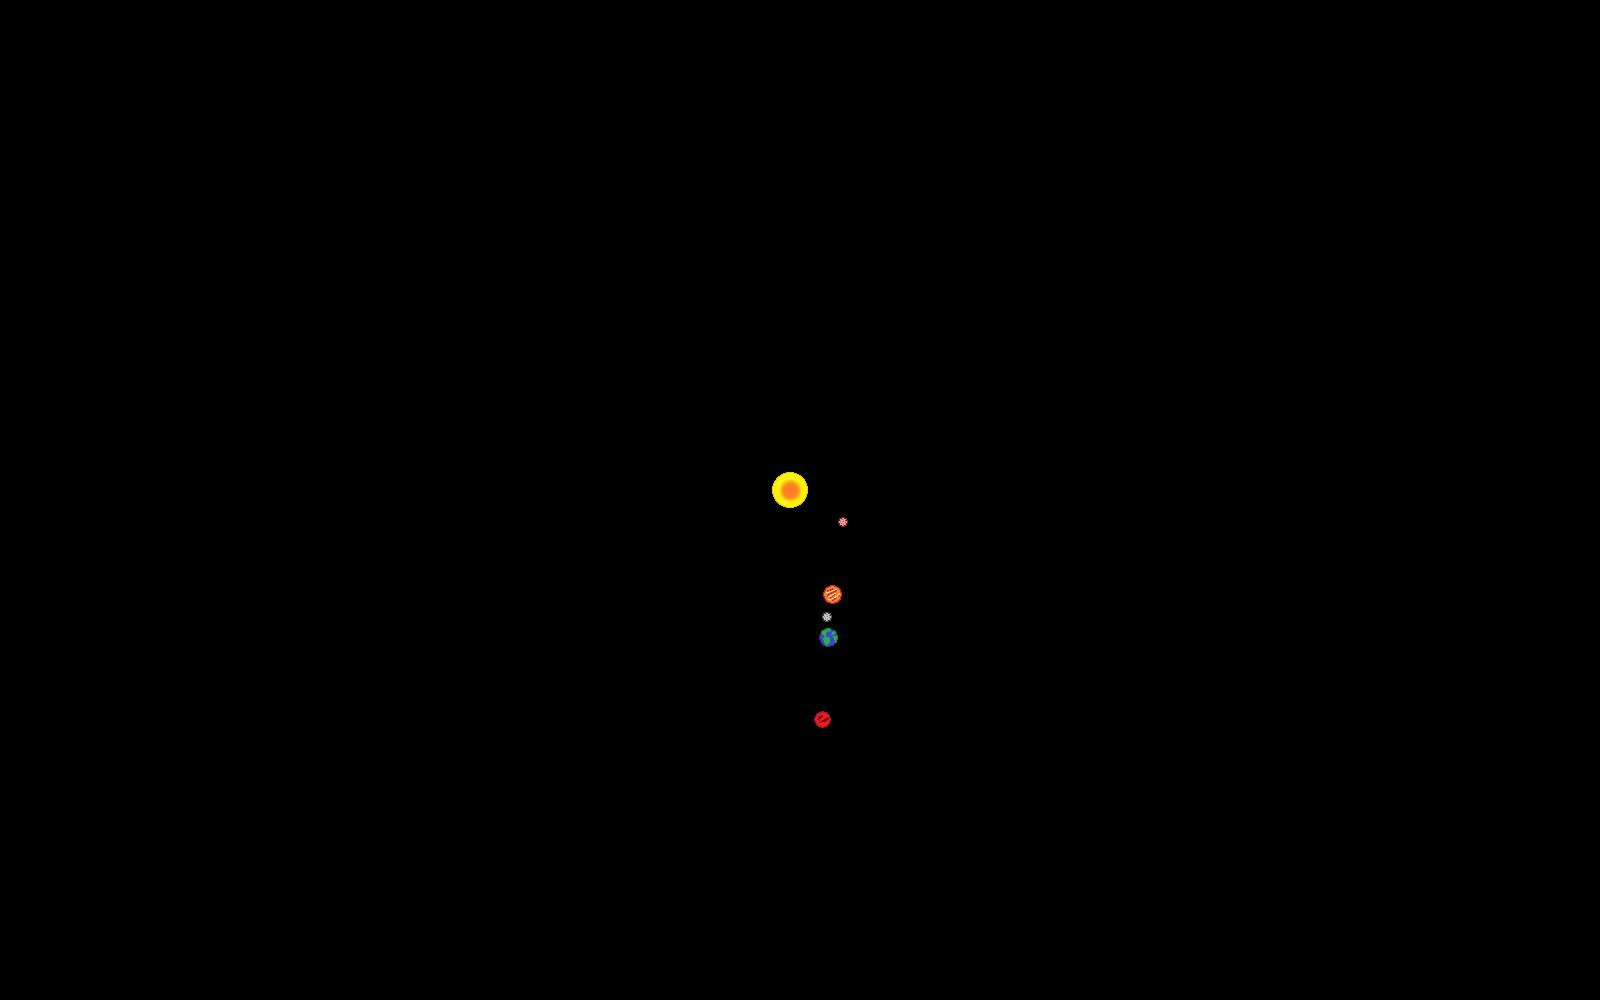

In [ ]:
import pygame,sys,time
import numpy as np 
from pygame.locals import *

#Variables de zoom y velocidad.
ajuste=1
ajusteD=1

tiempito=0;
TAM_SSX=1600;
TAM_SSY=1000;

pygame.init()
sistema = pygame.display.set_mode((TAM_SSX,TAM_SSY))
pygame.display.set_caption("Sistema Solar")
PosX_S,PosY_S=TAM_SSX/2-23,TAM_SSY/2-23

#Importar Imagenes hechas en paint de los planetas
Sol=pygame.image.load("Sun_00.png")
Tierra=pygame.image.load("Earth_00.png")
Luna=pygame.image.load("Moon_00.png")
Mercurio=pygame.image.load("Mercury_00.png")
Venus=pygame.image.load("Venus_00.png")
Marte=pygame.image.load("Mars_00.png")
Jupiter=pygame.image.load("Jupiter_00.png")
Saturno=pygame.image.load("Saturn_00.png")
Urano=pygame.image.load("Uranus_00.png")
Neptuno=pygame.image.load("Neptune_00.png")


#Tiempo en dias en el que se da una vuelta al sol (o a la tierra en el caso de la luna)
TV=243
TM=88
TT=365.25
TL=28.5
TMa=687
TJ=11.86*365.25
TS=29.5*365.25
TU=84*365.25
TN=165*365.25 

#Posiciones relativas 
PosX_T,PosY_T=0,0
PosX_Me,PosY_Me=0,0
PosX_V,PosY_V=0,0
PosX_M,PosY_M=0,0
PosX_Ma,PosY_Ma=0,0
PosX_Ju,PosY_Ju=0,0
PosX_Sa,PosY_Sa=0,0
PosX_U,PosY_U=0,0
PosX_N,PosY_N=0,0

Fondo=(0,0,0)
t=True
while t==True:
    clear_output(wait=True)
    #Distancias al sol
    DST=150/ajuste
    DLT=20/ajuste #Esta debería ser 0.4/ajuste, pero si es así, la luna queda dentro de la tierra.
    DSMe=60/ajuste
    DSV=110/ajuste
    DSMa=230/ajuste
    DSJ=780/ajuste
    DSS=1430/ajuste
    DSU=2870/ajuste
    DSN=4500/ajuste
    
    sistema.fill(Fondo)
    sistema.blit(Sol,(PosX_S-10,PosY_S-10))
    sistema.blit(Mercurio,(PosX_S+PosX_Me,PosY_S+PosY_Me))
    sistema.blit(Venus,(PosX_S+PosX_V,PosY_S+PosY_V))
    sistema.blit(Tierra,(PosX_S+PosX_T,PosY_S+PosY_T))
    sistema.blit(Luna,(PosX_S+PosX_T+PosX_M,PosY_S+PosY_T+PosY_M))
    sistema.blit(Marte,(PosX_S+PosX_Ma,PosY_S+PosY_Ma))
    sistema.blit(Jupiter,(PosX_S+PosX_Ju,PosY_S+PosY_Ju))
    sistema.blit(Saturno,(PosX_S+PosX_Sa,PosY_S+PosY_Sa))
    sistema.blit(Urano,(PosX_S+PosX_U,PosY_S+PosY_U))
    sistema.blit(Neptuno,(PosX_S+PosX_N,PosY_S+PosY_N))
    
    #presionar teclas flecha para zoom y x para cerrar
    for evento in pygame.event.get():
        if evento.type ==QUIT:
            pygame.quit()
            sys.exit()
        elif evento.type == pygame.KEYDOWN:
            if evento.key == K_LEFT:
                ajusteD=ajusteD*2
            elif evento.key == K_RIGHT:
                ajusteD=ajusteD/2
            elif evento.key == K_UP:
                ajuste=ajuste*2
            elif evento.key == K_DOWN:
                ajuste=ajuste/2
    
    #Trigonometria de los planetas
    PosX_T=DST*np.sin(tiempito)
    PosY_T=DST*np.cos(tiempito)
    
    PosX_M=DLT*np.sin(tiempito*TT/TL)
    PosY_M=DLT*np.cos(tiempito*TT/TL)
    
    PosX_Me=DSMe*np.sin(tiempito*TT/TM)
    PosY_Me=DSMe*np.cos(tiempito*TT/TM)
    
    PosX_V=DSV*np.sin(tiempito*TT/TV)
    PosY_V=DSV*np.cos(tiempito*TT/TV)
    
    PosX_Ma=DSMa*np.sin(tiempito*TT/TMa)
    PosY_Ma=DSMa*np.cos(tiempito*TT/TMa)
    
    PosX_Ju=DSJ*np.sin(tiempito*TT/TJ)
    PosY_Ju=DSJ*np.cos(tiempito*TT/TJ)
        
    PosX_Sa=DSS*np.sin(tiempito*TT/TS)
    PosY_Sa=DSS*np.cos(tiempito*TT/TS)   
    
    PosX_U=DSU*np.sin(tiempito*TT/TU)
    PosY_U=DSU*np.cos(tiempito*TT/TU)  
    
    PosX_N=DSN*np.sin(tiempito*TT/TN)
    PosY_N=DSN*np.cos(tiempito*TT/TN)
    
    #Paso del tiempo
    tiempito=ajusteD/TT+tiempito;
    
    #time.sleep(0.05)
    pygame.display.update()
    pygame.image.save(sistema, "screenshot.jpeg")
    testim = imread('screenshot.jpeg') 
    testim: np.array = cv2.cvtColor(testim, cv2.COLOR_BGR2RGB) 
    cv2_imshow(testim)

    t=True